# add all of libraries contributed in project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVR

In [3]:
data = pd.read_csv("heart.csv")
data=pd.DataFrame(data)
data.head()

,age,sex,chest pain,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,ST depression,exercise ST segment,major vessels,Thalassemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data=data.sample(frac=1)
data.head()

,age,sex,chest pain,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,ST depression,exercise ST segment,major vessels,Thalassemia,output
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 104 to 300
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   303 non-null    int64  
 1   sex                                   303 non-null    int64  
 2   chest pain                            303 non-null    int64  
 3   resting blood pressure                303 non-null    int64  
 4   cholestoral                           303 non-null    int64  
 5   fasting blood sugar                   303 non-null    int64  
 6   resting electrocardiographic results  303 non-null    int64  
 7   maximum heart rate achieved           303 non-null    int64  
 8   exercise induced angina               303 non-null    int64  
 9   ST depression                         303 non-null    float64
 10  exercise ST segment                   303 non-null    int64  
 11  major vessels    

In [6]:
data.shape

(303, 14)

In [7]:
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows :",duplicate_rows.shape)

Number of duplicate rows : (1, 14)


In [8]:
data1 = data.drop_duplicates()

In [9]:
print("Null values : ")
print(data1.isnull().sum())

Null values : 
age                                     0
sex                                     0
chest pain                              0
resting blood pressure                  0
cholestoral                             0
fasting blood sugar                     0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
ST depression                           0
exercise ST segment                     0
major vessels                           0
Thalassemia                             0
output                                  0
dtype: int64


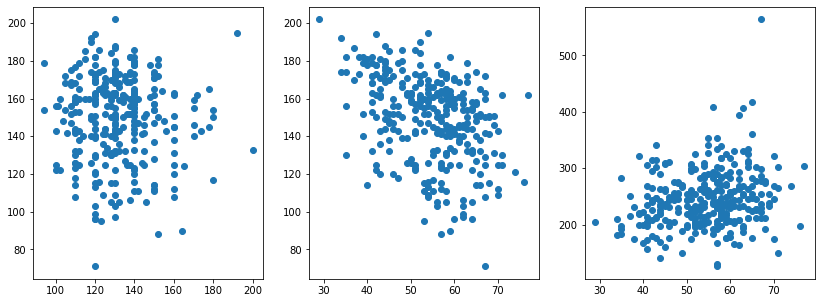

In [10]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.scatter(data1['resting blood pressure'],data1['maximum heart rate achieved']);
plt.subplot(1,3,2)
plt.scatter(data1['age'],data1['maximum heart rate achieved']);
plt.subplot(1,3,3)
plt.scatter(data1['age'],data1['cholestoral']);


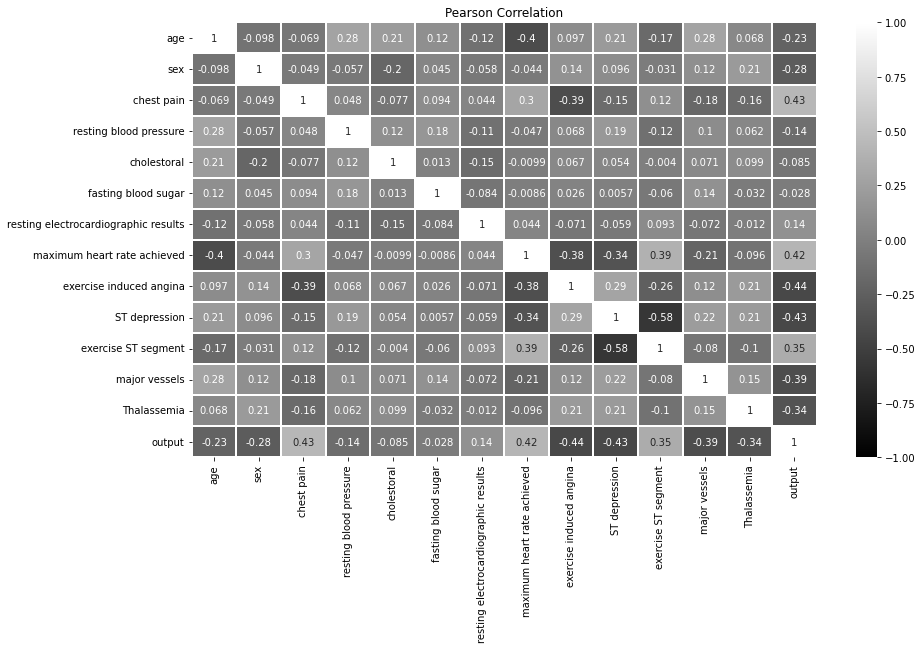

In [11]:
pearsonCorr = data.corr(method='pearson')
spearmanCorr = data.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "gray", annot=True,linewidths=0.2)
plt.title("Pearson Correlation");

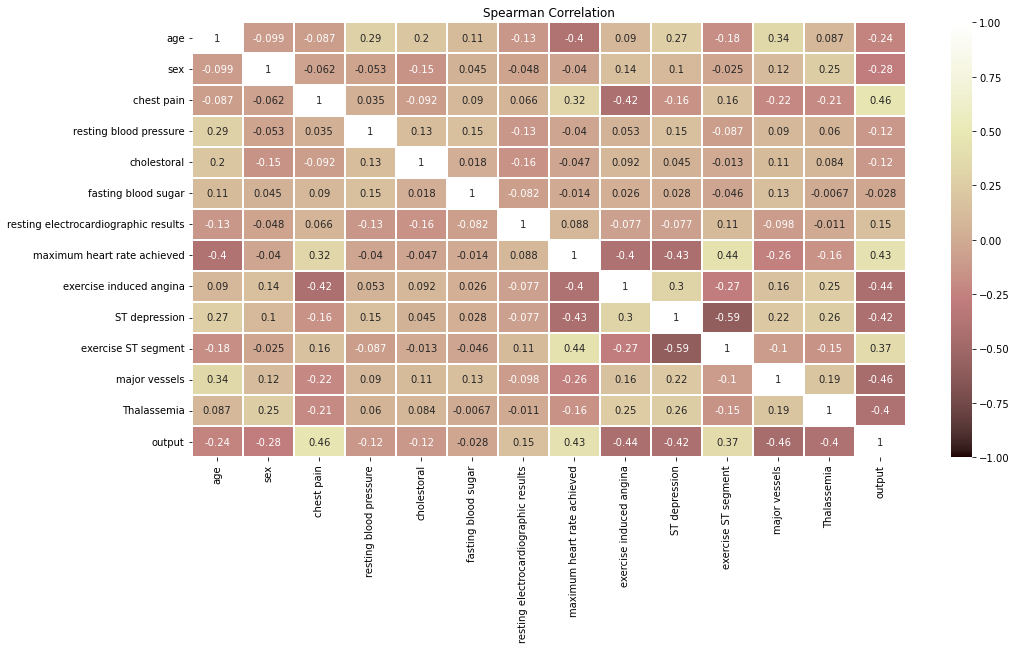

In [12]:
fig = plt.subplots(figsize=(16,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "pink",annot=True, linewidth=0.1)
plt.title("Spearman Correlation");

In [13]:
scaler = StandardScaler()
data_n=scaler.fit_transform(data1)
data_s=pd.DataFrame(data_n)
data_s.columns=['age','sex','c_pain','rbp','chol','blood sugar','rer','mhra','eia','ST','ST segment','mv','Thalassemia','output']
fbs=data_s.copy()
data_s.pop("blood sugar")
data_s.head()

,age,sex,c_pain,rbp,chol,rer,mhra,eia,ST,ST segment,mv,Thalassemia,output
0,-0.489377,0.682656,1.005911,-0.148432,-0.977399,0.901657,0.587366,-0.698344,-0.899544,0.979514,-0.714911,-0.513994,0.917313
1,-0.378671,-1.464866,-0.935208,-0.091401,1.132235,0.901657,-0.331045,1.431958,0.135360,-0.645834,-0.714911,1.119967,-1.090140
2,-0.710788,0.682656,0.035352,-0.091401,-0.029032,-1.002541,1.330842,-0.698344,-0.727060,-0.645834,-0.714911,-0.513994,0.917313
3,-0.267966,0.682656,-0.935208,-1.346085,-0.261285,0.901657,-0.112376,-0.698344,-0.813302,0.979514,2.269926,1.119967,0.917313
4,0.285561,0.682656,1.005911,1.049221,-2.332210,0.901657,1.024705,-0.698344,-0.727060,0.979514,0.280034,1.119967,0.917313


<Figure size 864x432 with 0 Axes>

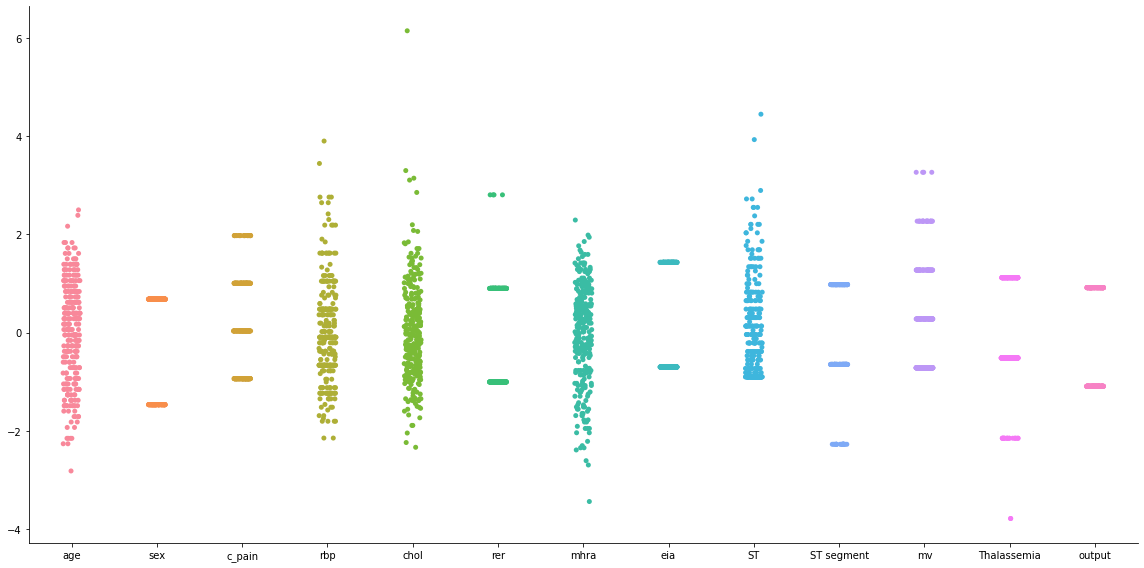

In [14]:
plt.figure(figsize=(12, 6));
sns.catplot(data=data_s,height=8,aspect=2,);

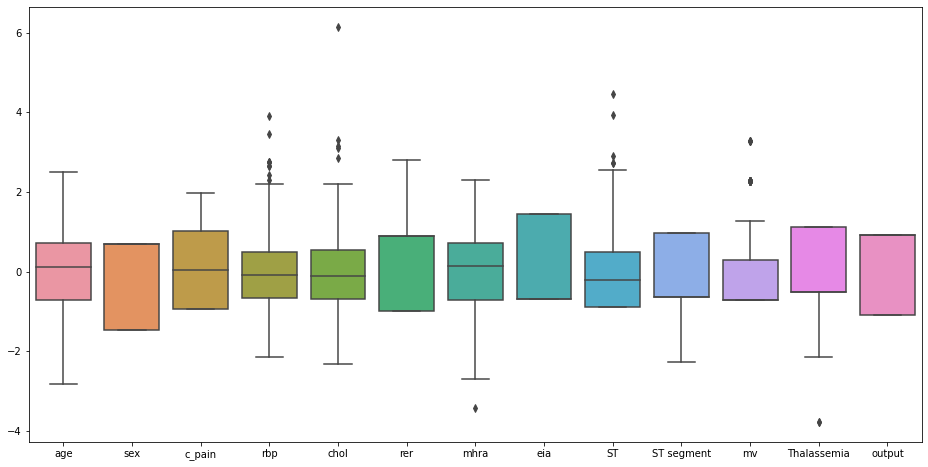

In [15]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=data_s);

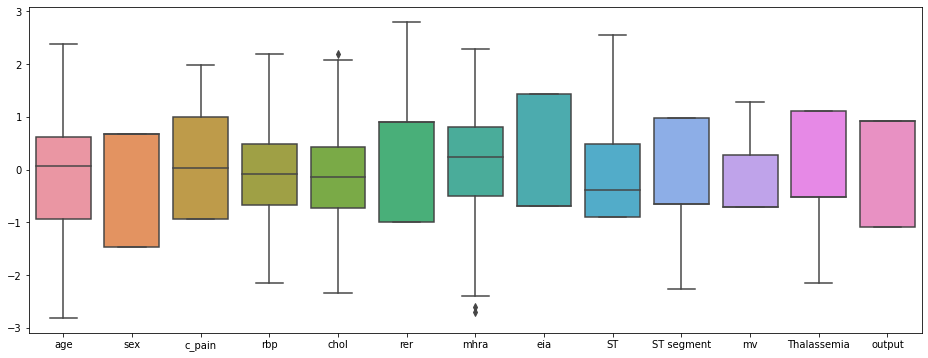

In [16]:
Q1 = data_s.quantile(0.25)
Q3 = data_s.quantile(0.75)
IQR = Q3-Q1
data_clear = data_s[~((data_s<(Q1-1.5*IQR))|(data_s>(Q3+1.5*IQR))).any(axis=1)]
plt.figure(figsize=(16, 6))
sns.boxplot(data=data_clear);

In [17]:
data_clear.loc[:,"blood sugar"]=fbs['blood sugar'];
data_clear

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,age,sex,c_pain,rbp,chol,rer,mhra,eia,ST,ST segment,mv,Thalassemia,output,blood sugar
0,-0.489377,0.682656,1.005911,-0.148432,-0.977399,0.901657,0.587366,-0.698344,-0.899544,0.979514,-0.714911,-0.513994,0.917313,-0.418446
1,-0.378671,-1.464866,-0.935208,-0.091401,1.132235,0.901657,-0.331045,1.431958,0.135360,-0.645834,-0.714911,1.119967,-1.090140,-0.418446
2,-0.710788,0.682656,0.035352,-0.091401,-0.029032,-1.002541,1.330842,-0.698344,-0.727060,-0.645834,-0.714911,-0.513994,0.917313,-0.418446
4,0.285561,0.682656,1.005911,1.049221,-2.332210,0.901657,1.024705,-0.698344,-0.727060,0.979514,0.280034,1.119967,0.917313,2.389793
5,0.506972,0.682656,0.035352,0.478910,-0.493538,0.901657,0.631100,1.431958,-0.899544,0.979514,-0.714911,-0.513994,0.917313,-0.418446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.839089,-1.464866,-0.935208,1.049221,-0.048386,0.901657,0.193761,1.431958,0.307844,-0.645834,-0.714911,-0.513994,-1.090140,-0.418446
297,-0.710788,0.682656,-0.935208,-0.547650,-0.474184,-1.002541,1.593245,-0.698344,-0.899544,0.979514,-0.714911,-0.513994,0.917313,-0.418446
298,-0.378671,-1.464866,1.005911,-0.661712,0.938690,-1.002541,0.324963,-0.698344,-0.382092,0.979514,-0.714911,-0.513994,0.917313,-0.418446
299,-0.378671,0.682656,1.005911,-1.802334,-0.474184,0.901657,-0.287311,1.431958,0.135360,-0.645834,-0.714911,-0.513994,0.917313,-0.418446


In [39]:
dataframe_final=pd.DataFrame(data_clear)
x=dataframe_final.drop("output",axis=1)
y=dataframe_final['output']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=36)

In [40]:
y_train=y_train.astype(int)
y_train+=1
y_test=y_test.astype(int)
y_test+=1

In [41]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_NB = gnb.predict(x_test)
print("Accuracy of Naive Bayes classifier : " ,accuracy_score(y_test,y_pred_NB))

Accuracy of Naive Bayes classifier :  0.8679245283018868


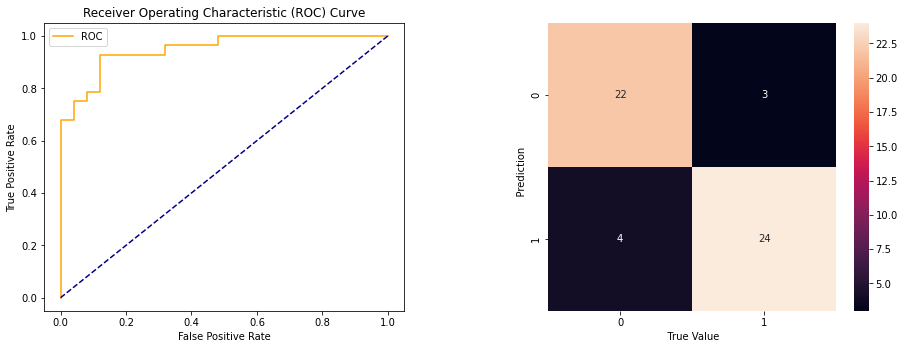

In [42]:
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
cf_matrix = confusion_matrix(y_test,y_pred_NB)
def plot_roc_curve(fpr, tpr):
    ax1.plot(fpr, tpr, color='orange', label='ROC')
    ax1.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    
probs = gnb.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('    True Value   ')
plt.ylabel('    Prediction       ')
plt.subplot(1,2,1)
plot_roc_curve(fpr, tpr)
plt.show()

In [43]:
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in range(0,4):
    logReg = LogisticRegression(random_state=36, solver=solver[i])
    logReg.fit(x_train,y_train)
    y_pred_lr = logReg.predict(x_test)
    print("Accuracy of logistic(",solver[i],") regression classifier : " ,accuracy_score(y_test,y_pred_lr))

Accuracy of logistic( newton-cg ) regression classifier :  0.9056603773584906
Accuracy of logistic( lbfgs ) regression classifier :  0.9056603773584906
Accuracy of logistic( liblinear ) regression classifier :  0.9056603773584906
Accuracy of logistic( sag ) regression classifier :  0.9056603773584906


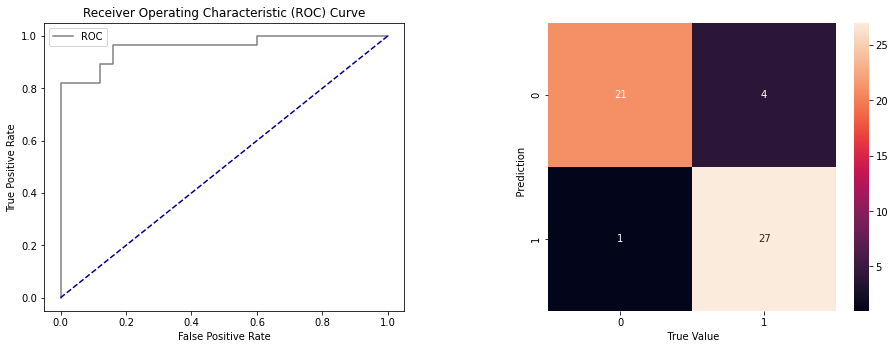

In [44]:
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
cf_matrix = confusion_matrix(y_test,y_pred_lr)
def plot_roc_curve(fpr, tpr):
    ax1.plot(fpr, tpr, color='gray', label='ROC')
    ax1.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    
probs = logReg.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('    True Value   ')
plt.ylabel('    Prediction       ')
plt.subplot(1,2,1)
plot_roc_curve(fpr, tpr)
plt.show()

In [45]:
for i in range(1,10):
    dtree = DecisionTreeClassifier(max_depth=i, random_state=0)
    dtree.fit(x_train,y_train)
    y_pred_dtree = dtree.predict(x_test)
    print("Accuracy of Decision Trees :: " ,accuracy_score(y_test,y_pred_dtree))

Accuracy of Decision Trees ::  0.6792452830188679
Accuracy of Decision Trees ::  0.7547169811320755
Accuracy of Decision Trees ::  0.8301886792452831
Accuracy of Decision Trees ::  0.7735849056603774
Accuracy of Decision Trees ::  0.7924528301886793
Accuracy of Decision Trees ::  0.7924528301886793
Accuracy of Decision Trees ::  0.7924528301886793
Accuracy of Decision Trees ::  0.7924528301886793
Accuracy of Decision Trees ::  0.7924528301886793


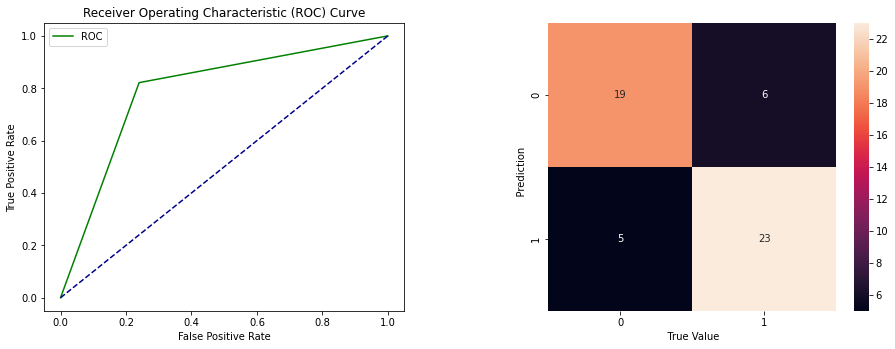

In [46]:
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
cf_matrix = confusion_matrix(y_test,y_pred_dtree)
def plot_roc_curve(fpr, tpr):
    ax1.plot(fpr, tpr, color='green', label='ROC')
    ax1.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = dtree.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('    True Value   ')
plt.ylabel('    Prediction       ')
plt.subplot(1,2,1)
plot_roc_curve(fpr, tpr)
plt.show()

In [47]:
for i in range(1,6):
    rf = RandomForestClassifier(n_estimators=i*100,random_state=15)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    print("Accuracy of Random Forest Classifier :",accuracy_score(y_test,y_pred_rf))

Accuracy of Random Forest Classifier : 0.8301886792452831
Accuracy of Random Forest Classifier : 0.8490566037735849
Accuracy of Random Forest Classifier : 0.8490566037735849
Accuracy of Random Forest Classifier : 0.8301886792452831
Accuracy of Random Forest Classifier : 0.8301886792452831


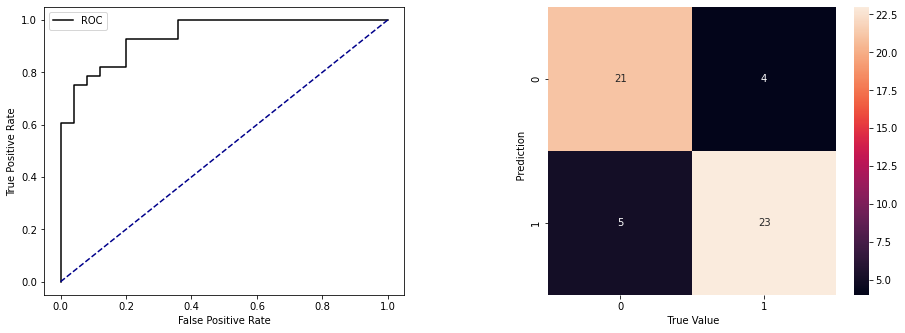

In [48]:
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
cf_matrix = confusion_matrix(y_test,y_pred_rf)
def plot_roc_curve(fpr, tpr):
    plt.subplot(1,2,1)
    ax1.plot(fpr, tpr, color='black', label='ROC')
    ax1.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
probs = rf.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('    True Value   ')
plt.ylabel('    Prediction       ')
plt.subplot(1,2,1)
plot_roc_curve(fpr, tpr)
plt.show()

In [49]:
for i in range(1,6):
    knn =  KNeighborsClassifier(n_neighbors=5*i)
    knn.fit(x_train,y_train)
    y_pred_knn = knn.predict(x_test)
    print("Accuracy of K-Neighbours classifier for k=",5*i,":",accuracy_score(y_test,y_pred_knn))

Accuracy of K-Neighbours classifier for k= 5 : 0.8301886792452831
Accuracy of K-Neighbours classifier for k= 10 : 0.8490566037735849
Accuracy of K-Neighbours classifier for k= 15 : 0.8490566037735849
Accuracy of K-Neighbours classifier for k= 20 : 0.8679245283018868
Accuracy of K-Neighbours classifier for k= 25 : 0.8679245283018868


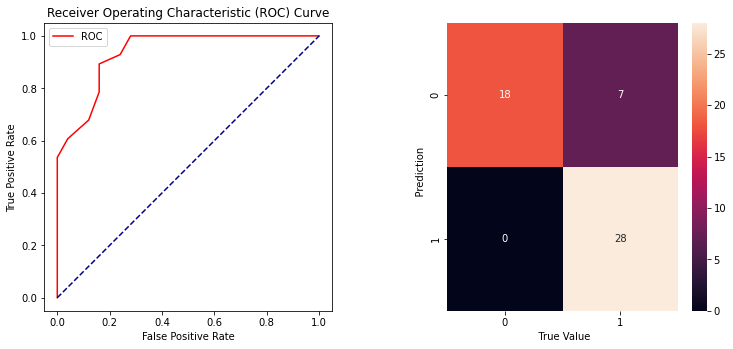

In [50]:
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(12,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
cf_matrix = confusion_matrix(y_test,y_pred_knn)
def plot_roc_curve(fpr, tpr):
    ax1.plot(fpr, tpr, color='red', label='ROC')
    ax1.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = knn.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('    True Value   ')
plt.ylabel('    Prediction       ')
plt.subplot(1,2,1)
plot_roc_curve(fpr, tpr)
plt.show()

In [51]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']
for i in range(0,4):
    svm=SVC(kernel=kernel[i],probability=True)
    svm.fit(x_train, y_train)
    y_pred_svm = svm.predict(x_test)
    print("Accuracy of SVM",(kernel[i])," classifier:" ,accuracy_score(y_test,y_pred_svm,))


Accuracy of SVM linear  classifier: 0.8679245283018868
Accuracy of SVM poly  classifier: 0.7735849056603774
Accuracy of SVM rbf  classifier: 0.8113207547169812
Accuracy of SVM sigmoid  classifier: 0.8867924528301887


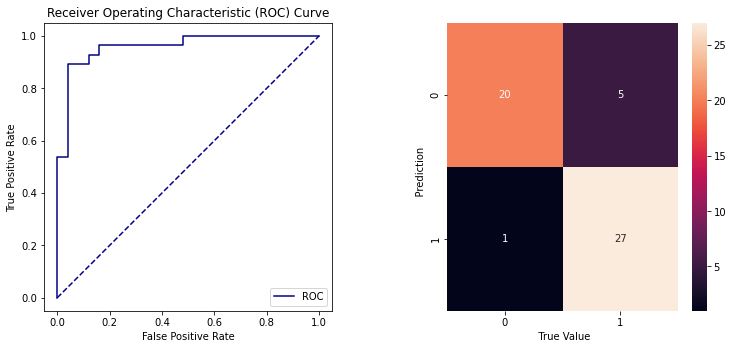

In [52]:
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(12,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
cf_matrix = confusion_matrix(y_test,y_pred_svm)
def plot_roc_curve(fpr, tpr):
    ax1.plot(fpr, tpr, color='navy', label='ROC')
    ax1.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = svm.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('    True Value   ')
plt.ylabel('    Prediction       ')
plt.subplot(1,2,1)
plot_roc_curve(fpr, tpr)
plt.show()

<BarContainer object of 6 artists>

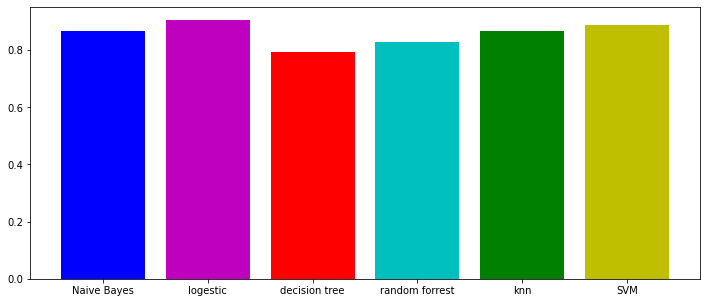

In [53]:
accuracy=[accuracy_score(y_test,y_pred_NB),accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_dtree),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_svm)]
color=['b','m','r','c','g','y']
results=['Naive Bayes','logestic','decision tree','random forrest','knn','SVM']
plt.figure(figsize=(12, 5))
plt.bar(results,accuracy,color=color)


In [54]:
pca=PCA(n_components=2,whiten=True).fit(data.drop('output', axis=1))
x_pca=pca.transform(data.drop('output', axis=1))
dataframe=pd.DataFrame(data=x_pca,columns=['F1', 'F2'])
x = dataframe
y = data['output']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [55]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_NB = gnb.predict(x_test)
print("Accuracy of Naive Bayes classifier : " ,accuracy_score(y_test,y_pred_NB))

Accuracy of Naive Bayes classifier :  0.7582417582417582


In [56]:
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)
y_pred_logReg = logReg.predict(x_test)
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))

Accuracy of logistic regression classifier ::  0.7252747252747253


In [57]:
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print("Accuracy of K-Neighbours classifier :",metrics.accuracy_score(y_test,y_pred_knn))

Accuracy of K-Neighbours classifier : 0.6043956043956044


In [58]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy of Random Forest Classifier :", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy of Random Forest Classifier : 0.6153846153846154


In [59]:
dtree1 = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree1.fit(x_train,y_train)
y_pred_dtree = dtree1.predict(x_test)
print("Accuracy of Decision Trees :: " , metrics.accuracy_score(y_test,y_pred_dtree))


Accuracy of Decision Trees ::  0.6813186813186813


In [60]:
svm=SVC(kernel='linear',probability=True)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
print("Accuracy of SVM classifier :",accuracy_score(y_test,y_pred_svm))

Accuracy of SVM classifier : 0.7472527472527473


In [61]:
pca_results={'NB':accuracy_score(y_test,y_pred_NB),
             'Logreg':metrics.accuracy_score(y_test,y_pred_logReg),
             'knn':metrics.accuracy_score(y_test,y_pred_knn),
             'Rf':metrics.accuracy_score(y_test, y_pred_rf),
             'dtree':metrics.accuracy_score(y_test,y_pred_dtree),
             'SVM':accuracy_score(y_test,y_pred_svm)}

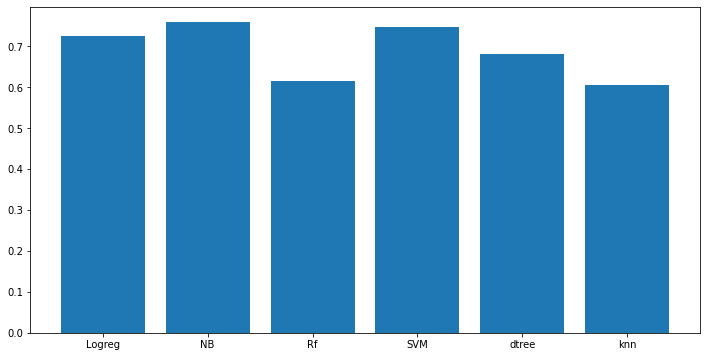

In [62]:
lists = sorted(pca_results.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,6))
plt.bar(x, y,align='center')
plt.show()